## Importing Libraries
**Pandas** :  Pandas Library is used for the *Data Manipulation and Analysis*.

**Numpy**  :  Numpy Library is use for Mathematical Computation and used as Arrays.

**Matplotlib** : Matplotlib Library is used to create Visualization from the Data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Dataset.

Here,we have used the Literacy Data of the 2011 Census.

In [2]:
df = pd.read_csv('Literacy Data 2011.csv')

In [3]:
df.head()

,Unnamed: 0,District,State,Literacy
0,1,Thane,Maharashtra,84.53
1,2,North Twenty Four Parganas,West Bengal,84.06
2,3,Bangalore,Karnataka,87.67
3,4,Pune,Maharashtra,86.15
4,5,Mumbai Suburban,Maharashtra,89.91


In [4]:
df.dtypes

Unnamed: 0      int64
District       object
State          object
Literacy      float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  640 non-null    int64  
 1   District    640 non-null    object 
 2   State       640 non-null    object 
 3   Literacy    640 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 20.1+ KB


## Checking the number of rows and columns of the data.

In [6]:
df.shape

(640, 4)

##  Names of the Columns

In [7]:
df.columns

Index(['Unnamed: 0', 'District', 'State', 'Literacy'], dtype='object')

## Renaming the column Unname: 0 as Id and Making it index of the Dataset.

In [8]:
df.rename(columns={'Unnamed: 0' : 'Id'},inplace=True)

In [9]:
df.set_index('Id',inplace=True)

In [10]:
df.head()

,District,State,Literacy
Id,,,
1,Thane,Maharashtra,84.53
2,North Twenty Four Parganas,West Bengal,84.06
3,Bangalore,Karnataka,87.67
4,Pune,Maharashtra,86.15
5,Mumbai Suburban,Maharashtra,89.91


## Statistical Summary of Numeric Variables:

In [11]:
df.describe()

,Literacy
count,640.000000
mean,72.308422
std,10.488816
min,36.100000
25%,65.095000
50%,72.170000
75%,79.962500
max,97.910000


## Find the values counts of each unique value in the given Series object

This will return the number of district by state.

In [13]:
df['State'].value_counts().head()

 Uttar Pradesh     71
 Madhya Pradesh    50
 Bihar             38
 Maharashtra       35
 Rajasthan         33
Name: State, dtype: int64

Tota Number of States & Union Terrritory

In [32]:
df['State'].value_counts().count()

35

<AxesSubplot:>

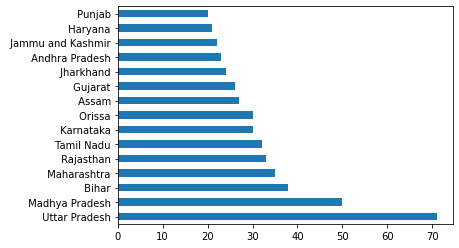

In [43]:
df.State.value_counts().sort_values(ascending=False).head(15).plot(kind = 'barh')

In [45]:
df['Literacy'].value_counts().count()

593

In [60]:
df[(df.Literacy > 90)].sort_values(ascending=False,by='Literacy')

,District,State,Literacy
Id,,,
626,Serchhip,Mizoram,97.91
558,Aizawl,Mizoram,97.89
635,Mahe,Puducherry,97.87
234,Kottayam,Kerala,97.21
398,Pathanamthitta,Kerala,96.55
610,Champhai,Mizoram,95.91
104,Ernakulam,Kerala,95.89
215,Alappuzha,Kerala,95.72
170,Kannur,Kerala,95.10


In [64]:
df1 = df[(df.Literacy > 90)].sort_values(ascending=False,by='Literacy').head(10)

In [66]:
df1

,District,State,Literacy
Id,,,
626,Serchhip,Mizoram,97.91
558,Aizawl,Mizoram,97.89
635,Mahe,Puducherry,97.87
234,Kottayam,Kerala,97.21
398,Pathanamthitta,Kerala,96.55
610,Champhai,Mizoram,95.91
104,Ernakulam,Kerala,95.89
215,Alappuzha,Kerala,95.72
170,Kannur,Kerala,95.10


These Are three States of India which has top 10 Literate District.

<AxesSubplot:>

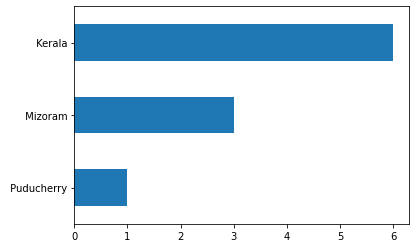

In [84]:
df1.State.value_counts().sort_values(ascending=True).plot(kind = 'barh')

Top 10 Literate District

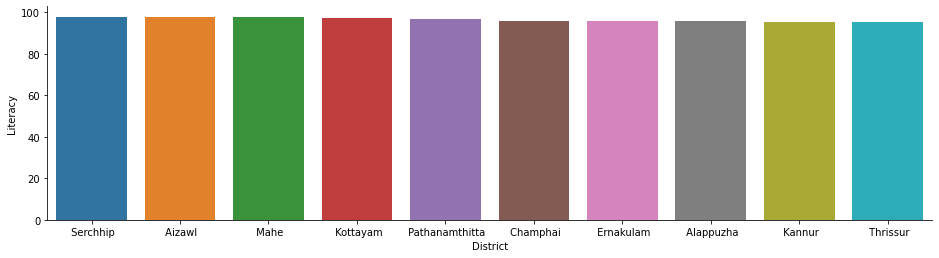

In [74]:
sns.catplot(x="District", y="Literacy",
                data=df1, kind="bar",
                height=3.5, aspect=3.7);

In [57]:
df[(df.Literacy > 90)].count()

District    22
State       22
Literacy    22
dtype: int64

## Checking for the null Values.
This Dataset Does not Contain the Null Values.

In [14]:
df.isnull().sum()

District    0
State       0
Literacy    0
dtype: int64

## Distribution of the Data.

<AxesSubplot:xlabel='Literacy', ylabel='Count'>

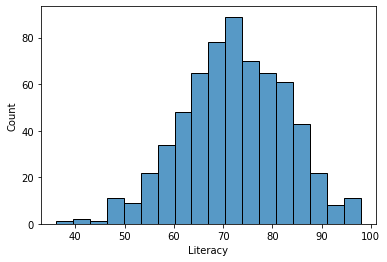

In [15]:
sns.histplot(data=df,x=df['Literacy'])

## Checking for the Outliers

<AxesSubplot:xlabel='Literacy'>

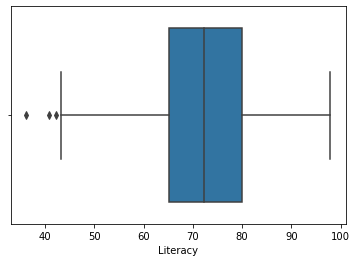

In [16]:
sns.boxplot(x=df['Literacy'])

Let's See which are Outliers.

In [17]:
q1,q3 = df['Literacy'].quantile([0.25,0.75])
IQR = q3-q1
lower_limit  = q1 - 1.5*IQR
upper_limit =  q3 + 1.5*IQR

In [18]:
df[(df.Literacy < q1 - 1.5*IQR) | ( df.Literacy > q3 + 1.5*IQR)]

,District,State,Literacy
Id,,,
498,Alirajpur,Madhya Pradesh,36.10
540,Dantewada,Chhattisgarh,42.12
581,Bijapur,Chhattisgarh,40.86


These Outliers Tell us that this are State which has recorded Lowest Literacy Rate.

In [77]:
df[(df.Literacy < 50)].sort_values(ascending=True,by='Literacy').head(10)

,District,State,Literacy
Id,,,
498,Alirajpur,Madhya Pradesh,36.10
581,Bijapur,Chhattisgarh,40.86
540,Dantewada,Chhattisgarh,42.12
440,Jhabua,Madhya Pradesh,43.30
392,Nabarangapur,Orissa,46.43
414,Shrawasti,Uttar Pradesh,46.74
521,Malkangiri,Orissa,48.54
607,Narayanpur,Chhattisgarh,48.62
617,Kurung Kumey,Arunachal Pradesh,48.75


In [79]:
df2 = df[(df.Literacy < 50)].sort_values(ascending=True,by='Literacy').head(10)

<AxesSubplot:>

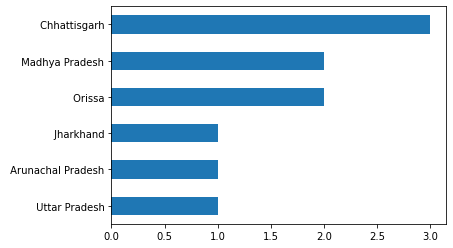

In [86]:
df2.State.value_counts().sort_values(ascending=True).plot(kind = 'barh')

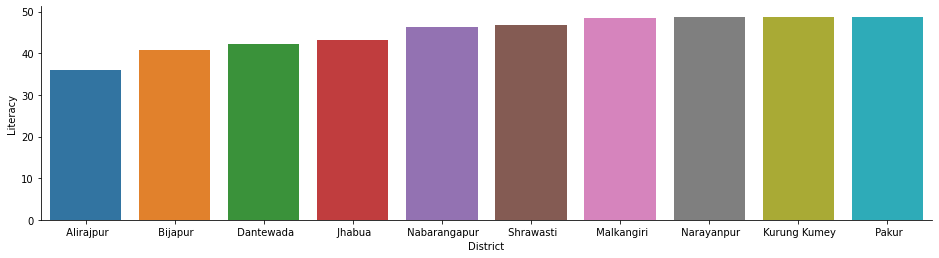

In [87]:
sns.catplot(x="District", y="Literacy",
                data=df2, kind="bar",
                height=3.5, aspect=3.7);